In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
%matplotlib inline


Using TensorFlow backend.


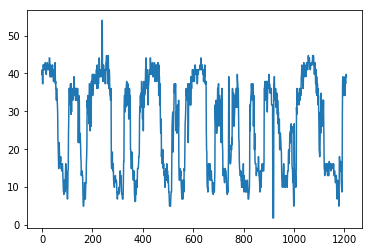

In [2]:
# load the dataset
##bb表表示风速
dataframe = pd.read_excel('speed.xlsx')
dataset = dataframe.iloc[:,1].values
# 将整型变为float
dataset = dataset.astype('float32')

plt.plot(dataset)
plt.show()


In [3]:
dataset=dataset[:-1]
print(dataset.shape)

(1208,)


In [4]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

# fix random seed for reproducibility
np.random.seed(7)


In [5]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = np.reshape(dataset,newshape=(-1,1))
dataset = scaler.fit_transform(dataset)


# split into train and test sets
train_size = int(len(dataset) * 0.9)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]



In [6]:
# use this function to prepare the train and test datasets for modeling
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)


In [7]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
print(trainX.shape)
print(testX.shape)

(1083, 1, 3)
(117, 1, 3)


In [8]:
from keras.callbacks import EarlyStopping,ModelCheckpoint

es = EarlyStopping(monitor='val_acc',patience=5)


In [9]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(2048, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=50, batch_size=200,callbacks=[es],verbose=2)



Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/50
 - 17s - loss: 0.2101
Epoch 2/50


D:\Anaconda3\lib\site-packages\keras\callbacks.py:569: RuntimeWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


 - 5s - loss: 0.0515
Epoch 3/50
 - 5s - loss: 0.0182
Epoch 4/50
 - 5s - loss: 0.0284
Epoch 5/50
 - 5s - loss: 0.0130
Epoch 6/50
 - 5s - loss: 0.0127
Epoch 7/50
 - 5s - loss: 0.0125
Epoch 8/50
 - 5s - loss: 0.0095
Epoch 9/50
 - 5s - loss: 0.0096
Epoch 10/50
 - 5s - loss: 0.0088
Epoch 11/50
 - 5s - loss: 0.0082
Epoch 12/50
 - 5s - loss: 0.0080
Epoch 13/50
 - 5s - loss: 0.0076
Epoch 14/50
 - 5s - loss: 0.0074
Epoch 15/50
 - 4s - loss: 0.0072
Epoch 16/50
 - 4s - loss: 0.0070
Epoch 17/50
 - 5s - loss: 0.0069
Epoch 18/50
 - 5s - loss: 0.0068
Epoch 19/50
 - 5s - loss: 0.0067
Epoch 20/50
 - 5s - loss: 0.0066
Epoch 21/50
 - 5s - loss: 0.0066
Epoch 22/50
 - 5s - loss: 0.0065
Epoch 23/50
 - 5s - loss: 0.0065
Epoch 24/50
 - 5s - loss: 0.0064
Epoch 25/50
 - 5s - loss: 0.0064
Epoch 26/50
 - 5s - loss: 0.0064
Epoch 27/50
 - 5s - loss: 0.0063
Epoch 28/50
 - 5s - loss: 0.0063
Epoch 29/50
 - 5s - loss: 0.0063
Epoch 30/50
 - 5s - loss: 0.0062
Epoch 31/50
 - 5s - loss: 0.0062
Epoch 32/50
 - 5s - loss: 0.0

In [10]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [11]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])


In [12]:
#预测值的结果
testPredict[:,0]

array([36.71632  , 38.024586 , 35.36494  , 35.72961  , 36.410763 ,
       35.025497 , 35.518444 , 32.966137 , 33.595024 , 31.832136 ,
       28.66118  , 23.0763   , 20.522696 , 18.879667 , 19.244349 ,
       22.391973 , 27.156548 , 25.7323   , 26.452164 , 31.37234  ,
       29.531517 , 30.598263 , 31.759495 , 31.444357 , 28.144783 ,
       27.814676 , 30.757742 , 30.337273 , 32.003113 , 28.270933 ,
       22.002943 , 17.393875 , 15.75153  , 14.313327 , 14.589334 ,
       14.69231  , 15.193789 , 16.087019 , 16.46306  , 15.85759  ,
       16.290785 , 15.354392 , 15.029815 , 14.826946 , 14.093979 ,
       13.789644 , 15.493274 , 15.152354 , 14.296282 , 13.789644 ,
       14.753875 , 16.319286 , 16.616125 , 16.66684  , 15.85759  ,
       16.290785 , 15.721732 , 15.549623 , 15.046752 , 15.261164 ,
       15.346424 , 16.154604 , 16.46306  , 15.85759  , 15.549623 ,
       15.413819 , 15.413819 , 15.413819 , 16.154604 , 15.721732 ,
       14.44856  , 13.856713 , 14.387493 , 13.95972  , 13.7896

In [13]:
testY[0]

array([39.15000083, 34.18000049, 36.04000104, 37.27999725, 34.18000049,
       36.04000104, 31.68999881, 34.18000049, 31.06999759, 26.71999847,
       19.87999922, 19.25999955, 18.02000023, 19.25999955, 24.22999834,
       29.82999826, 24.22999834, 26.71999847, 34.7999986 , 27.95999779,
       31.06999759, 32.93000125, 31.06999759, 26.10000036, 27.95999779,
       32.93000125, 29.82999826, 32.93000125, 26.10000036, 18.02000023,
       14.90999966, 14.90999966, 13.05000067, 14.28999999, 14.28999999,
       14.90999966, 16.15999968, 16.15999968, 14.90999966, 16.15999968,
       14.28999999, 14.28999999, 14.28999999, 13.05000067, 13.05000067,
       16.15999968, 14.28999999, 13.05000067, 13.05000067, 14.90999966,
       16.77999934, 16.15999968, 16.15999968, 14.90999966, 16.15999968,
       14.90999966, 14.90999966, 14.28999999, 14.90999966, 14.90999966,
       16.15999968, 16.15999968, 14.90999966, 14.90999966, 14.90999966,
       14.90999966, 14.90999966, 16.15999968, 14.90999966, 13.05

In [14]:
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f MSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f MSE' % (testScore))


Train Score: 3.86 MSE
Test Score: 3.72 MSE


<Figure size 720x432 with 0 Axes>

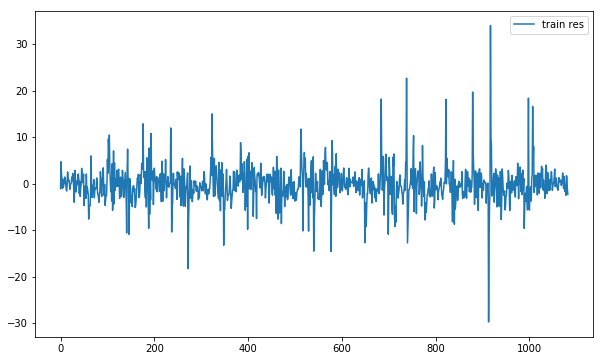

In [15]:
Res_train = []
for i,j in zip(trainY[0], trainPredict[:,0]):
    temp = i-j
    Res_train.append(temp)
Res_train = np.array(Res_train) 
plt.figure(figsize=(10,6))
plt.plot(Res_train,label='train res')
plt.legend(loc='best')
plt.show()

<Figure size 720x432 with 0 Axes>

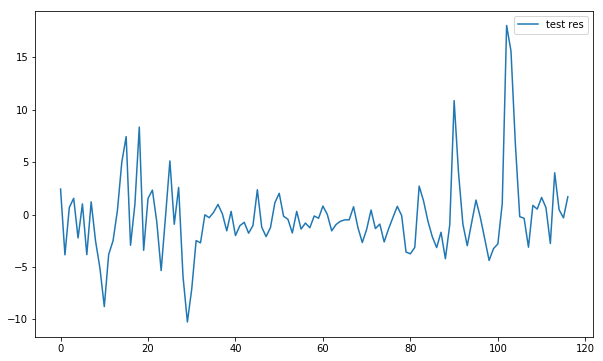

In [16]:
Res_test = []
for i,j in zip(testY[0], testPredict[:,0]):
    temp = i-j
    Res_test.append(temp)
Res_test = np.array(Res_test) 
plt.figure(figsize=(10,6))
plt.plot(Res_test,label='test res')
plt.legend(loc='best')
plt.show()

<Figure size 720x432 with 0 Axes>

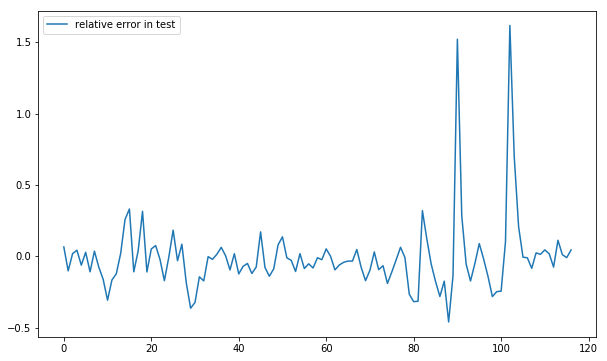

0.13790268578460052


In [17]:
relative_test = []
for i,j in zip(testY[0], testPredict[:,0]):
    temp = (i-j)/j
    relative_test.append(temp)
relative_test = np.array(relative_test) 
plt.figure(figsize=(10,6))
plt.plot(relative_test,label='relative error in test')
plt.legend(loc='best')
plt.show()
print(sum(abs(relative_test))/len(relative_test))

<Figure size 720x432 with 0 Axes>

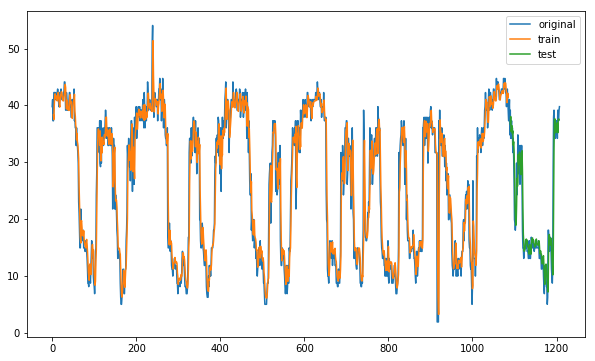

In [18]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.figure(figsize=(10,6))
plt.plot(scaler.inverse_transform(dataset),label='original')
plt.plot(trainPredictPlot,label='train')
plt.plot(testPredictPlot,label='test')
plt.legend(loc='best')
plt.show()


In [19]:
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
print(testPredict.shape)

ss = np.reshape(dataset[-117:],newshape=(-1,1))
print(ss.shape)
mm = np.empty_like(dataset)
mm[:,:] = np.nan
mm[len(trainPredict)+(look_back*2)+1:len(dataset)-1,:] = ss
print(mm.shape)


(117, 1)
(117, 1)
(1208, 1)


<Figure size 720x432 with 0 Axes>

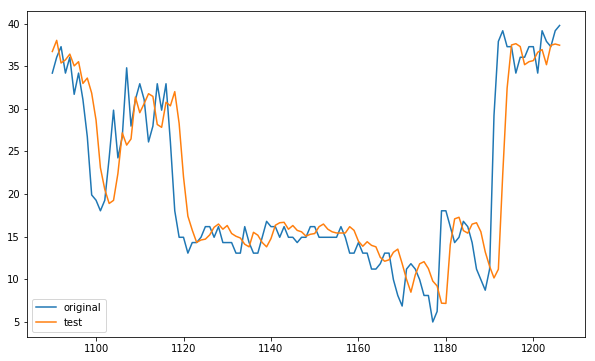

In [20]:
# plot baseline and predictions
plt.figure(figsize=(10,6))
plt.plot(scaler.inverse_transform(mm),label='original')
plt.plot(testPredictPlot,label='test')
plt.legend(loc='best')
plt.show()

In [73]:
x = dataframe.iloc[:,0]
print(x)

0       4/11/2016 00:08:22
1       4/11/2016 00:16:22
2       4/11/2016 00:19:22
3       4/11/2016 00:22:23
4       4/11/2016 00:31:22
5       4/11/2016 00:33:23
6       4/11/2016 00:41:22
7       4/11/2016 00:51:23
8       4/11/2016 00:55:23
9       4/11/2016 01:00:23
10      4/11/2016 01:04:23
11      4/11/2016 01:10:23
12      4/11/2016 01:15:23
13      4/11/2016 01:21:22
14      4/11/2016 01:26:22
15      4/11/2016 01:31:22
16      4/11/2016 01:33:22
17      4/11/2016 01:39:23
18      4/11/2016 01:46:22
19      4/11/2016 01:47:22
20      4/11/2016 01:54:23
21      4/11/2016 02:01:23
22      4/11/2016 02:06:23
23      4/11/2016 02:10:22
24      4/11/2016 02:16:21
25      4/11/2016 02:20:23
26      4/11/2016 02:26:21
27      4/11/2016 02:30:23
28      4/11/2016 02:36:22
29      4/11/2016 02:39:22
               ...        
1179    4/17/2016 19:53:12
1180    4/17/2016 20:01:11
1181    4/17/2016 20:06:11
1182    4/17/2016 20:14:11
1183    4/17/2016 20:30:11
1184    4/17/2016 20:33:11
1